# Naive Bayes approach

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import common

import numpy as np
import pandas as pd
import sklearn.dummy
import sklearn.naive_bayes

In [3]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('full', 'count', None)
baseline_classifier = sklearn.dummy.DummyClassifier()
baseline_classifier.fit(train_as_vec, train_targets)

/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/home/asgavar/.local/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier(constant=None, random_state=None, strategy='warn')

SCORE: 0.20060713317722087
[[0.06008021 0.05761222 0.11873361 0.22393182 0.53964214]
 [0.06146303 0.06260051 0.11880761 0.22624044 0.53088841]
 [0.06123824 0.06104012 0.11677068 0.22708271 0.53386825]
 [0.06277113 0.05940058 0.1189052  0.22484838 0.53407471]
 [0.06118256 0.0602415  0.11798674 0.2252462  0.535343  ]]


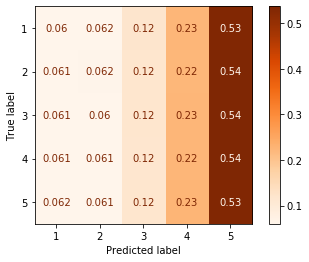

In [4]:
common.display_classifier_performance(baseline_classifier, test_as_vec, test_targets)

## Performance measure row schema

In [5]:
results_df = pd.DataFrame.from_dict([
    common.perf_row(
        baseline_classifier, test_as_vec, test_targets, 'baseline',
        'full', 'count', None, fit_prior='N/A', alpha='N/A')])
results_df

,classifier_type,sampling,representation,preprocessing,fit_prior,alpha,score
0,baseline,full,count,None,N/A,N/A,0.19905


## One multi-class combined classifier, exposed to all classes at once

In [6]:
### TODO
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
                        'random_downsampling', 'count', 'stem')
train_as_vec
### TODO

<395194x337862 sparse matrix of type '<class 'numpy.int64'>'
	with 41208754 stored elements in Compressed Sparse Row format>

In [8]:
for sampling in ['random_downsampling', 'full']:# , 'oversampled']:
    print(f'sampling = {sampling}')
    for representation in ['count', 'tf_idf']:
        print(f'    representation = {representation}')
        for preprocessing in [None, 'stem']:
            print(f'        preprocessing = {preprocessing}')
            for fit_prior in [False, True]:
                print(f'            fit_prior = {fit_prior}')
                for alpha in np.arange(0.1, 5., .1):

                    train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
                        sampling, representation, preprocessing)

                    classifier = sklearn.naive_bayes.MultinomialNB(fit_prior=fit_prior, alpha=alpha)
                    classifier.fit(train_as_vec, train_targets)

                    results_df = results_df.append([
                            common.perf_row(
                                classifier, test_as_vec, test_targets,
                                'multiclass', sampling, representation, 
                                preprocessing, fit_prior=fit_prior, alpha=alpha)])

sampling = random_downsampling
    representation = count
        preprocessing = None
            fit_prior = False
            fit_prior = True
        preprocessing = stem
            fit_prior = False
            fit_prior = True
    representation = tf_idf
        preprocessing = None
            fit_prior = False
            fit_prior = True
        preprocessing = stem
            fit_prior = False
            fit_prior = True
sampling = full
    representation = count
        preprocessing = None
            fit_prior = False


/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


            fit_prior = True
        preprocessing = stem
            fit_prior = False


/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


            fit_prior = True
    representation = tf_idf
        preprocessing = None
            fit_prior = False


/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


            fit_prior = True
        preprocessing = stem
            fit_prior = False


/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


            fit_prior = True


In [9]:
results_df.sort_values('score', ascending=False).head(25)

,classifier_type,sampling,representation,preprocessing,fit_prior,alpha,score
0,multiclass,random_downsampling,tf_idf,None,True,0.5,0.473654
0,multiclass,random_downsampling,tf_idf,None,True,0.6,0.473553
0,multiclass,random_downsampling,tf_idf,None,False,0.5,0.473528
0,multiclass,random_downsampling,tf_idf,stem,True,0.6,0.473487
0,multiclass,random_downsampling,tf_idf,None,True,0.7,0.473258
0,multiclass,random_downsampling,tf_idf,stem,True,0.5,0.473246
0,multiclass,random_downsampling,tf_idf,None,False,0.4,0.473210
0,multiclass,random_downsampling,tf_idf,None,True,0.4,0.473200
0,multiclass,random_downsampling,tf_idf,None,False,0.6,0.473168
0,multiclass,random_downsampling,tf_idf,None,True,0.8,0.473164
